# Data Source: [Kaggle : New York City Airbnb Open Data](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data?fbclid=IwAR2Qv1tnMRb9Spk5ckWki5nSV6d9nN0vZM9jzvfXQDNWoznxMWwUNU6ymJU)

Dataset last updated : 2019-08-12

### Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Lodaing Data

In [5]:
# Mount the drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [6]:
fname = '/content/drive/My Drive/Test/Airbnb NYC/AB_NYC_2019.csv'
airbnb =  pd.read_csv(fname)

## Exploratory Data Analysis


In [7]:
airbnb.shape

(48895, 16)

In [ ]:
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


### Check duplicates

In [8]:
dupes = airbnb.duplicated()
print("# of duplicated data : ", sum(dupes))

# of duplicated data :  0


### Check Missing values

In [ ]:
airbnb.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
# unique entries per column
airbnb.nunique(axis=0)

id                                48895
name                              47905
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

### Check Outliers

In [9]:
numerical = ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']
categorical = ['host_id', 'neighbourhood_group', 'neighbourhood', 'room_type', 'last_review']

[Text(0, 0, 'price'),
 Text(0, 0, 'minimum_nights'),
 Text(0, 0, 'number_of_reviews'),
 Text(0, 0, 'reviews_per_month'),
 Text(0, 0, 'calculated_host_listings_count'),
 Text(0, 0, 'availability_365')]

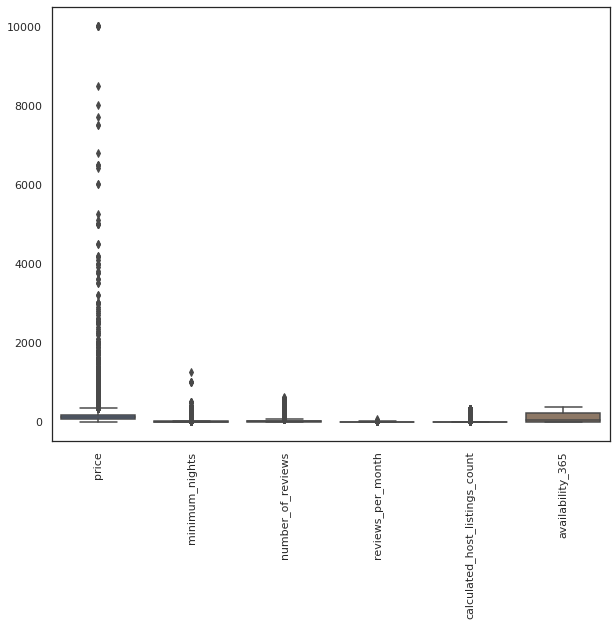

In [10]:
fig, ax = plt.subplots(figsize = (10, 8))

bp = sns.boxplot( data = airbnb[numerical])

bp.set_xticklabels(bp.get_xticklabels(), rotation = 90)

In [11]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
scaled_array = scalar.fit_transform(airbnb[numerical])

In [12]:
scaled_data = pd.DataFrame(scaled_array, columns = numerical)

[Text(0, 0, 'price'),
 Text(0, 0, 'minimum_nights'),
 Text(0, 0, 'number_of_reviews'),
 Text(0, 0, 'reviews_per_month'),
 Text(0, 0, 'calculated_host_listings_count'),
 Text(0, 0, 'availability_365')]

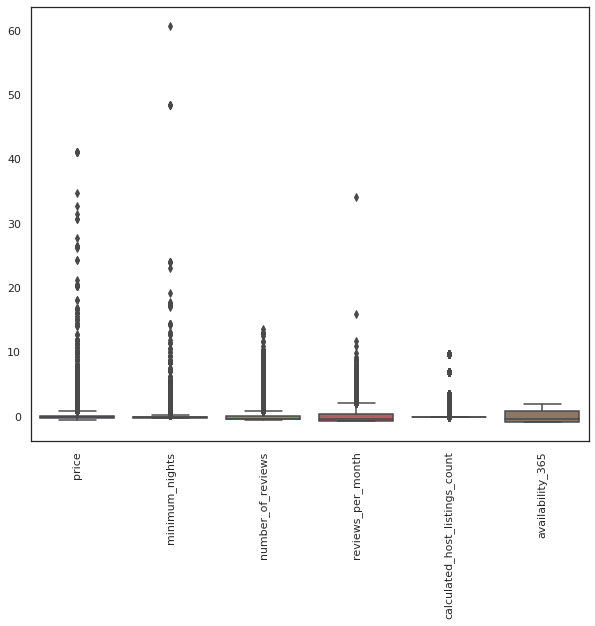

In [13]:
fig, ax = plt.subplots(figsize = (10, 8))
bp = sns.boxplot( data = scaled_data)
bp.set_xticklabels(bp.get_xticklabels(), rotation = 90)

In [14]:
Q1 = airbnb[numerical].quantile(0.25)
Q3 = airbnb[numerical].quantile(0.75)

IQR = Q3 - Q1
print(IQR)

price                             106.00
minimum_nights                      4.00
number_of_reviews                  23.00
reviews_per_month                   1.83
calculated_host_listings_count      1.00
availability_365                  227.00
dtype: float64


In [15]:
# Remove outliers

outliers_removed_data = airbnb[ ~ ((airbnb[numerical] < (Q1 - 1.5 * IQR)) \
                                        | (airbnb[numerical] > (Q3 + 1.5 * IQR))).any(axis =1)]

In [16]:
outliers_removed_data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
10,5295,Beautiful 1br on Upper West Side,7702,Lena,Manhattan,Upper West Side,40.80316,-73.96545,Entire home/apt,135,5,53,2019-06-22,0.43,1,6
18,7726,Hip Historic Brownstone Apartment with Backyard,20950,Adam And Charity,Brooklyn,Crown Heights,40.67592,-73.94694,Entire home/apt,99,3,53,2019-06-22,4.44,1,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48889,36484363,QUIT PRIVATE HOUSE,107716952,Michael,Queens,Jamaica,40.69137,-73.80844,Private room,65,1,0,NaN,NaN,2,163
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27


[Text(0, 0, 'price'),
 Text(0, 0, 'minimum_nights'),
 Text(0, 0, 'number_of_reviews'),
 Text(0, 0, 'reviews_per_month'),
 Text(0, 0, 'calculated_host_listings_count'),
 Text(0, 0, 'availability_365')]

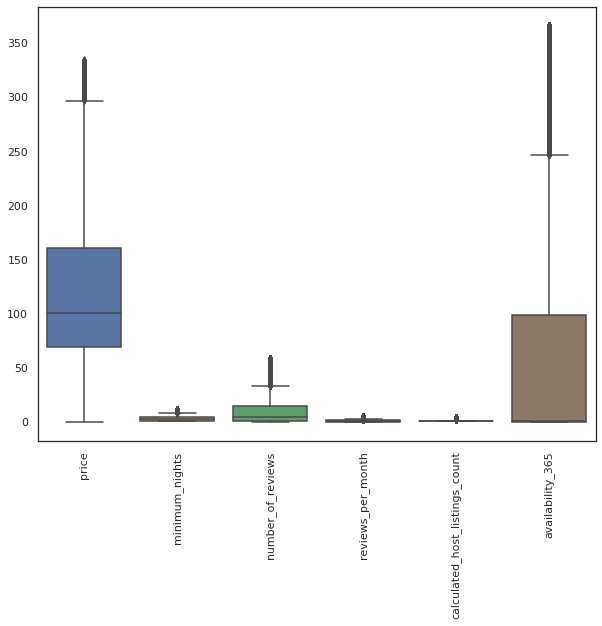

In [17]:
fig, ax = plt.subplots(figsize = (10, 8))
bp = sns.boxplot( data = outliers_removed_data[numerical])
bp.set_xticklabels(bp.get_xticklabels(), rotation = 90)

In [18]:
outliers_removed_data[numerical].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,30307.000000,30307.000000,30307.000000,24041.000000,30307.000000,30307.000000
mean,121.087043,2.872274,9.973735,0.895013,1.266803,72.500544
std,67.264008,1.951319,13.445465,1.042824,0.561726,113.563329
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,69.000000,1.000000,1.000000,0.140000,1.000000,0.000000
50%,100.000000,2.000000,4.000000,0.460000,1.000000,1.000000
75%,160.000000,4.000000,14.000000,1.240000,1.000000,98.500000
max,334.000000,11.000000,58.000000,4.760000,3.000000,365.000000


In [ ]:
airbnb[numerical].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [19]:
print(outliers_removed_data.shape)
print(airbnb.shape)

(30307, 16)
(48895, 16)


?? Maybe too much deletion

?? For new lets just roll with it.

### Data Pattern

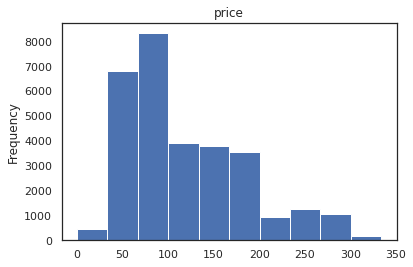

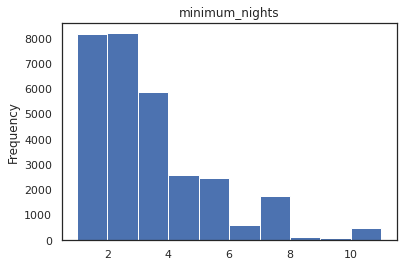

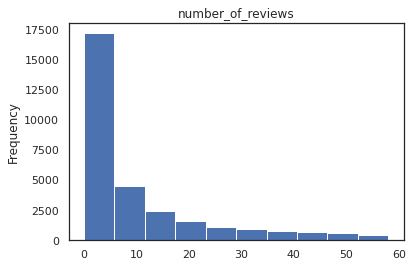

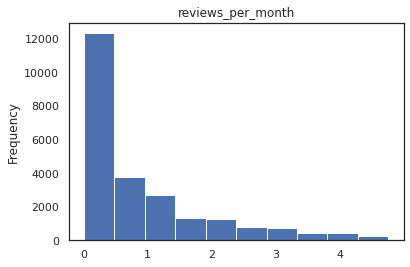

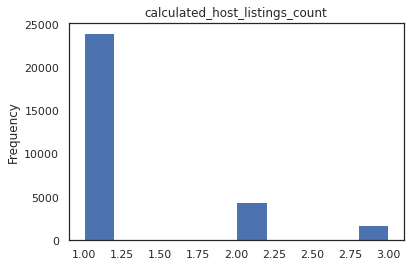

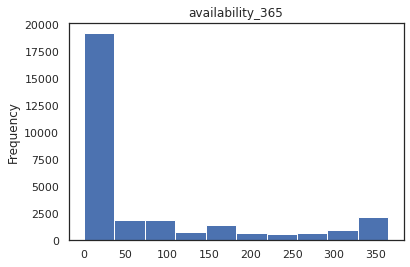

In [20]:
for col in numerical:
  outliers_removed_data[col].plot.hist()
  plt.title(col)
  plt.show()

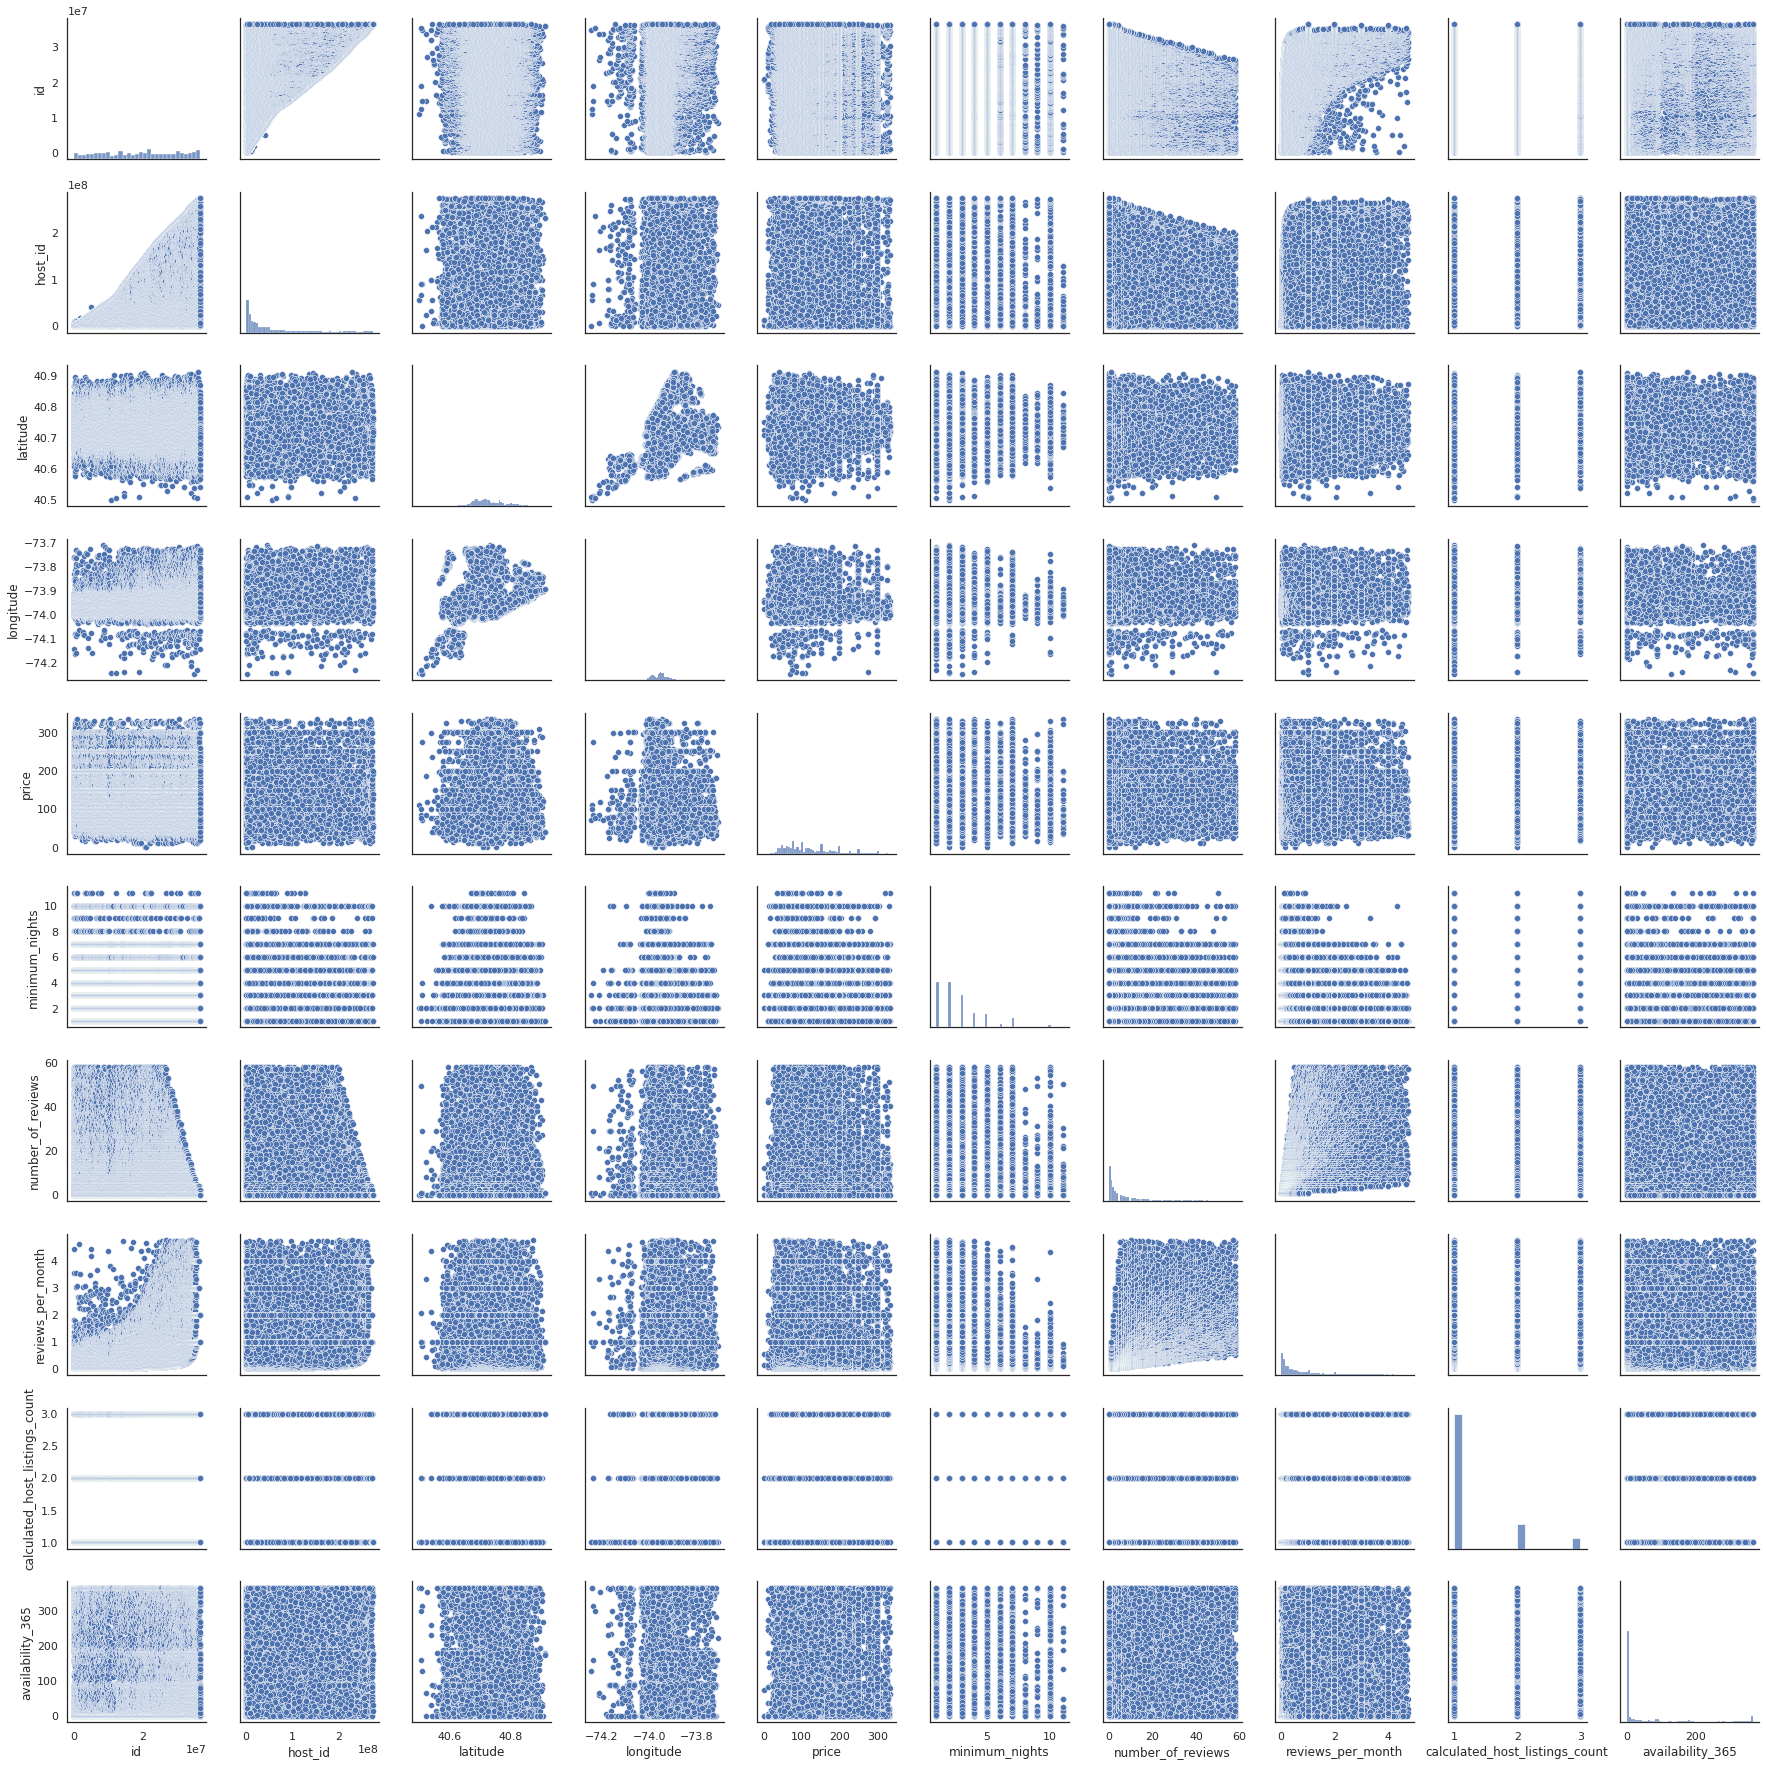

In [21]:
import seaborn as sns

sns.set(style='white')
g=sns.pairplot(outliers_removed_data) 
plt.show()

## Feature Engineering

In [22]:
outliers_removed_data.last_review = pd.to_datetime(outliers_removed_data.last_review)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [23]:
outliers_removed_data['last_review_days'] = (pd.to_datetime('1/1/2020') - outliers_removed_data.last_review).astype('timedelta64[D]')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [24]:
outliers_removed_data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,last_review_days
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,225.0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,NaN,1,365,NaN
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,408.0
10,5295,Beautiful 1br on Upper West Side,7702,Lena,Manhattan,Upper West Side,40.80316,-73.96545,Entire home/apt,135,5,53,2019-06-22,0.43,1,6,193.0
18,7726,Hip Historic Brownstone Apartment with Backyard,20950,Adam And Charity,Brooklyn,Crown Heights,40.67592,-73.94694,Entire home/apt,99,3,53,2019-06-22,4.44,1,21,193.0


In [25]:
outliers_removed_data[outliers_removed_data.number_of_reviews == 0].isna().sum()

id                                   0
name                                 8
host_id                              0
host_name                            5
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       6266
reviews_per_month                 6266
calculated_host_listings_count       0
availability_365                     0
last_review_days                  6266
dtype: int64

In [26]:
outliers_removed_data.isna().sum()

id                                   0
name                                14
host_id                              0
host_name                           14
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       6266
reviews_per_month                 6266
calculated_host_listings_count       0
availability_365                     0
last_review_days                  6266
dtype: int64

?? If number of reviews is 0, then there is no last reivew nor review per month data. Maybe these listings are new and do not have any reviews yet.

In [27]:
outliers_removed_data.last_review_days =  outliers_removed_data.last_review_days.fillna(0)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [28]:
outliers_removed_data.reviews_per_month =  outliers_removed_data.reviews_per_month.fillna(0)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [29]:
outliers_removed_data.isna().sum()

id                                   0
name                                14
host_id                              0
host_name                           14
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       6266
reviews_per_month                    0
calculated_host_listings_count       0
availability_365                     0
last_review_days                     0
dtype: int64

?? Not considering name, host_name, latitude, longitude and last_review for now. Maybe we could do sentiment analysis or someting with name, because people's perception of listing may be affected by the name description of the house. 

Example [Clean & quiet apt home by the park], it adds positive vibe to the airbnb house.


In [31]:
data = outliers_removed_data.drop(['id', 'name', 'host_id','host_name', 'latitude', 'longitude', 'last_review'], axis =1)

In [32]:
data.isna().sum()

neighbourhood_group               0
neighbourhood                     0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
last_review_days                  0
dtype: int64

In [33]:
data.nunique(axis=0)

neighbourhood_group                  5
neighbourhood                      217
room_type                            3
price                              305
minimum_nights                      11
number_of_reviews                   59
reviews_per_month                  473
calculated_host_listings_count       3
availability_365                   366
last_review_days                  1690
dtype: int64

In [34]:
data.columns

Index(['neighbourhood_group', 'neighbourhood', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'last_review_days'],
      dtype='object')

In [35]:
cat_vars = ['neighbourhood_group', 'neighbourhood', 'room_type',
       'minimum_nights', 'calculated_host_listings_count']
cat_data = data[cat_vars]

cat_vars_onehot=pd.get_dummies(cat_data)
print(cat_vars_onehot.head())


    minimum_nights  ...  room_type_Shared room
1                1  ...                      0
2                3  ...                      0
4               10  ...                      0
10               5  ...                      0
18               3  ...                      0

[5 rows x 227 columns]


In [36]:
data = pd.concat([data, cat_vars_onehot], axis=1)

In [37]:
data.drop(columns=cat_vars, inplace=True)

In [38]:
data.head()

,price,number_of_reviews,reviews_per_month,availability_365,last_review_days,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,neighbourhood_Allerton,neighbourhood_Arden Heights,neighbourhood_Arrochar,neighbourhood_Arverne,neighbourhood_Astoria,neighbourhood_Bath Beach,neighbourhood_Battery Park City,neighbourhood_Bay Ridge,neighbourhood_Bay Terrace,"neighbourhood_Bay Terrace, Staten Island",neighbourhood_Baychester,neighbourhood_Bayside,neighbourhood_Bayswater,neighbourhood_Bedford-Stuyvesant,neighbourhood_Belle Harbor,neighbourhood_Bellerose,neighbourhood_Belmont,neighbourhood_Bensonhurst,neighbourhood_Bergen Beach,neighbourhood_Boerum Hill,neighbourhood_Borough Park,neighbourhood_Breezy Point,neighbourhood_Briarwood,neighbourhood_Brighton Beach,neighbourhood_Bronxdale,neighbourhood_Brooklyn Heights,neighbourhood_Brownsville,neighbourhood_Bull's Head,neighbourhood_Bushwick,neighbourhood_Cambria Heights,...,neighbourhood_Springfield Gardens,neighbourhood_Spuyten Duyvil,neighbourhood_St. Albans,neighbourhood_St. George,neighbourhood_Stapleton,neighbourhood_Stuyvesant Town,neighbourhood_Sunnyside,neighbourhood_Sunset Park,neighbourhood_Theater District,neighbourhood_Throgs Neck,neighbourhood_Todt Hill,neighbourhood_Tompkinsville,neighbourhood_Tottenville,neighbourhood_Tremont,neighbourhood_Tribeca,neighbourhood_Two Bridges,neighbourhood_Unionport,neighbourhood_University Heights,neighbourhood_Upper East Side,neighbourhood_Upper West Side,neighbourhood_Van Nest,neighbourhood_Vinegar Hill,neighbourhood_Wakefield,neighbourhood_Washington Heights,neighbourhood_West Brighton,neighbourhood_West Farms,neighbourhood_West Village,neighbourhood_Westchester Square,neighbourhood_Westerleigh,neighbourhood_Whitestone,neighbourhood_Williamsbridge,neighbourhood_Williamsburg,neighbourhood_Willowbrook,neighbourhood_Windsor Terrace,neighbourhood_Woodhaven,neighbourhood_Woodlawn,neighbourhood_Woodside,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
1,225,45,0.38,355,225.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,150,0,0.00,365,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,80,9,0.10,0,408.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
10,135,53,0.43,6,193.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
18,99,53,4.44,21,193.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [39]:
data.shape

(30307, 230)

## Modeling

In [40]:

from  sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.drop(columns='price'), data.price, test_size=0.2, random_state=0)

In [41]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [42]:
r_sq = model.score(X_train, y_train)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.5179940745832252


In [43]:
print('intercept:', model.intercept_)
print('slope:', model.coef_)


intercept: 14543220464.307404
slope: [-2.23644169e-01 -4.89086803e-01  8.92329380e-02 -8.20165416e-03
 -9.00834771e+09 -9.09927468e+09 -1.39745974e+10 -7.93685647e+09
 -8.91502644e+09 -3.08229274e+08 -4.01550549e+08 -4.01550508e+08
 -1.37972046e+09 -1.37972047e+09 -2.17302289e+08  4.65802055e+09
 -2.17302271e+08 -1.37972043e+09 -4.01550484e+08 -3.08229255e+08
 -1.37972048e+09 -1.37972049e+09 -2.17302263e+08 -1.37972046e+09
 -1.37972048e+09 -3.08229239e+08 -2.17302286e+08 -2.17302281e+08
 -2.17302227e+08 -2.17302281e+08 -1.37972035e+09 -1.37972049e+09
 -2.17302269e+08 -3.08229281e+08 -2.17302225e+08 -2.17302278e+08
 -4.01550528e+08 -2.17302266e+08 -1.37972049e+09 -2.17302284e+08
 -2.17302235e+08 -3.08229305e+08 -4.01550446e+08  4.65802055e+09
  4.65802052e+09 -3.08229261e+08  4.65802053e+09 -3.08229244e+08
 -3.08229232e+08 -4.01550556e+08 -2.17302250e+08 -3.08229240e+08
 -2.17302225e+08 -1.37972051e+09 -2.17302242e+08 -4.01550482e+08
 -3.08229255e+08 -3.08229245e+08 -2.17302209e+08 -1.3

In [45]:
y_pred = model.predict(X_test)

In [46]:
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

,Actual,Predicted
18858,125,130.669235
36665,87,84.598358
38823,90,124.178749
36739,180,140.176126
4134,55,63.843184
...,...,...
28428,55,79.117491
9110,40,51.525827
14964,105,131.682369
37456,150,173.522789


?? Honestly feels like Linear regression is not a good choice for this problem. None of the variables show linear relationship with price.

In [ ]:
sns.set(style='white')
g=sns.pairplot(outliers_removed_data) 
plt.show()

## Results